# Annotations d'images et vérifications

Les images ont été annotées manuellement, à l'aide de [Label Studio](https://labelstud.io/) en local.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

Il faut :
- renommer les images sans les id devants
- ...

Fonction pour afficher les bounding boxes, réalisée avec la coopération de ChatGPT 3.5 (_Plot the bounding boxes of a yolo formated bounding box onto its corresponding image_.)

In [12]:
def draw_bounding_boxes(image_path, label_path):
    # Ouvrir l'image et la numpyser
    with Image.open(image_path) as img:
        img_np = np.array(img)
        height, width, _ = img_np.shape

        # Lire les labels
        with open(label_path, 'r') as f:
            labels = f.readlines()

        fig, ax = plt.subplots(1)
        ax.imshow(img_np)

        for label in labels:
            # spliter les labels
            label_data = label.strip().split()
            # Ne pas garder la 1ère partie qui contient le 0 de la classe pool
            x_center, y_center, box_width, box_height = map(float, label_data[1:])

            # Convert YOLO format to matplotlib format
            x_center *= width
            y_center *= height
            box_width *= width
            box_height *= height

            x1 = x_center - (box_width / 2)
            y1 = y_center - (box_height / 2)

            # Afficher un patch rouge sur l'image
            rect = patches.Rectangle((x1, y1), box_width, box_height, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

        plt.show()

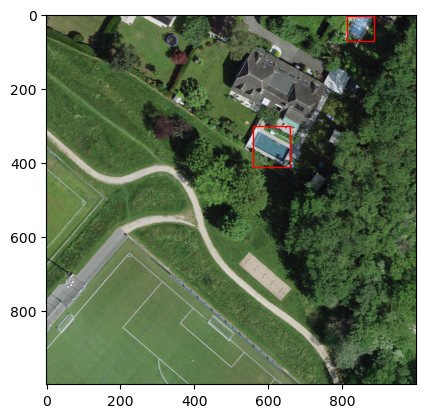

In [13]:
draw_bounding_boxes("../data/img_avec_piscines/annotations/images/0d14a97b-25018-11141.jpg", "../data/img_avec_piscines/annotations/labels/0d14a97b-25018-11141.txt")